In [8]:
import numpy as np 
from qc_lab.algorithms import MeanField
from qc_lab.models import SpinBosonModel
from qc_lab import Simulation
from qc_lab.dynamics import serial_driver



simulation_settings = dict(dt = 0.01, tmax = 25, num_trajs = 1000, batch_size = 1000)
sim = Simulation(simulation_settings)
sim.model = SpinBosonModel(dict(l_reorg=1/4,V=1,E=0.5,W=0.1))
sim.algorithm = MeanField()


wf_db_0 = np.zeros(sim.model.constants.num_quantum_states) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.wf_db = wf_db_0

data_mf = serial_driver(sim)

100%|██████████| 2501/2501 [00:26<00:00, 94.76it/s]


1000


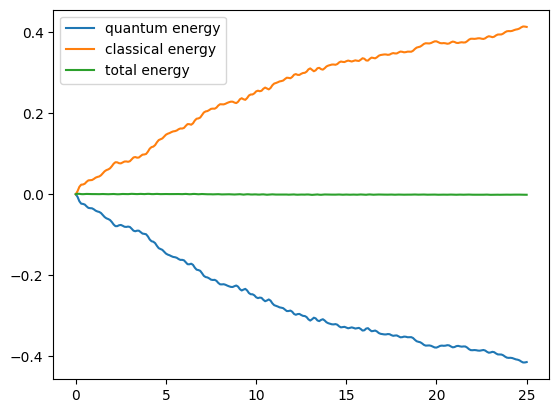

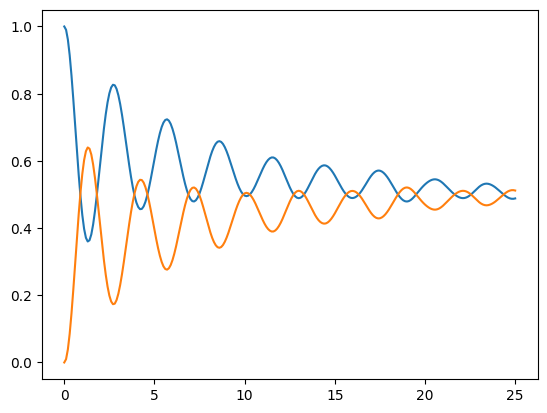

In [9]:
data = data_mf
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))

import matplotlib.pyplot as plt
plt.plot(sim.settings.tdat_output, eq-eq[0], label='quantum energy')
plt.plot(sim.settings.tdat_output,ec-ec[0], label='classical energy') 
plt.plot(sim.settings.tdat_output,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(sim.settings.tdat_output,pops)
plt.show()

In [1]:
import numpy as np 
from qc_lab.algorithms import FewestSwitchesSurfaceHopping
from qc_lab.models import SpinBoson
from qc_lab import Simulation
from qc_lab.dynamics import serial_driver



simulation_settings = dict(dt = 0.01, tmax = int(1/0.0260677), num_trajs = 10, batch_size = 10)
sim = Simulation(simulation_settings)
sim.model = SpinBoson(dict(temp = 1, V=1.0, E=0.5, A=100, W=0.1, l_reorg=1.0/4))
sim.algorithm = FewestSwitchesSurfaceHopping({'fssh_deterministic':True})


wf_db_0 = np.zeros(sim.model.constants.num_quantum_states) + 0.0j
wf_db_0[0] = 1.0+0.0j
sim.state.wf_db = wf_db_0

data_fssh = serial_driver(sim)

  0%|          | 0/3801 [00:00<?, ?it/s]

(10, 2, 2)
[1.+1.66477698e-32j 1.-8.78205854e-33j 1.+1.29933937e-32j
 1.-8.60788661e-33j 1.+2.55561701e-33j]


  8%|▊         | 293/3801 [00:01<00:08, 426.59it/s]

(10, 2, 2)
[1.+6.93889390e-18j 1.-6.93889390e-18j 1.+0.00000000e+00j
 1.+6.93889390e-18j 1.-3.46944695e-18j]
(10, 2, 2)
[1.+0.00000000e+00j 1.-3.46944695e-18j 1.+1.38777878e-17j
 1.-1.38777878e-17j 1.+2.08166817e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+2.77555756e-17j 1.-1.38777878e-17j
 1.-1.38777878e-17j 1.+2.77555756e-17j]
(10, 2, 2)
[1.+0.0000000e+00j 1.+0.0000000e+00j 1.+0.0000000e+00j 1.+0.0000000e+00j
 1.-6.9388939e-18j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.-3.46944695e-17j]
(10, 2, 2)
[1.-2.77555756e-17j 1.+2.42861287e-17j 1.+5.55111512e-17j
 1.+0.00000000e+00j 1.-4.85722573e-17j]
(10, 2, 2)
[1.-5.55111512e-17j 1.-3.46944695e-18j 1.+5.55111512e-17j
 1.+0.00000000e+00j 1.+6.93889390e-18j]
(10, 2, 2)
[1.+0.00000000e+00j 1.-1.38777878e-17j 1.+5.55111512e-17j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+5.55111512e-17j 1.+0.00000000e+00j 1.-5.55111512e-17j
 1.-2.77555756e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-6.9388939

 14%|█▍        | 541/3801 [00:01<00:04, 725.07it/s]

(10, 2, 2)
[1.+1.73472348e-18j 1.+3.46944695e-18j 1.-1.73472348e-18j
 1.-1.38777878e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+1.04083409e-17j 1.+0.00000000e+00j
 1.-1.38777878e-17j 1.-2.77555756e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+2.77555756e-17j 1.-2.77555756e-17j]
(10, 2, 2)
[1.+2.77555756e-17j 1.-3.46944695e-18j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-6.93889390e-18j 1.+3.46944695e-18j 1.+0.00000000e+00j
 1.+8.32667268e-17j 1.-3.46944695e-18j]
(10, 2, 2)
[1.-2.08166817e-17j 1.-3.46944695e-18j 1.+0.00000000e+00j
 1.+2.77555756e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+6.93889390e-18j 1.+1.73472348e-18j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.-8.67361738e-19j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+8.67361738e-18j]
(10, 2, 2)
[1.+0.00000000e+00j 1.-1.38777878e-17j 1.+0.00000000e+00j
 1.+2.77555756e-17j 1.+4.33680869e-19j]
(10, 2, 2)
[1.-3.46

 22%|██▏       | 839/3801 [00:01<00:02, 1053.05it/s]

(10, 2, 2)
[1.+0.00000000e+00j 1.-6.93889390e-18j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.-1.38777878e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.-6.93889390e-18j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+2.77555756e-17j]
(10, 2, 2)
[1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]
(10, 2, 2)
[1.+2.77555756e-17j 1.+6.93889390e-18j 1.+0.00000000e+00j
 1.+1.38777878e-17j 1.-2.77555756e-17j]
(10, 2, 2)
[1.-3.46944695e-18j 1.-2.77555756e-17j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+2.68882139e-17j]
(10, 2, 2)
[1.-8.67361738e-19j 1.-3.12250226e-17j 1.+0.00000000e+00j
 1.+8.67361738e-19j 1.+1.38777878e-17j]
(10, 2, 2)
[1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]
(10, 2, 2)
[1.+1.04083409e-17j 1.+0.00000000e+00j 1.+3.46944695e-18j
 1.+0.00000000e+00j 1.-3.46944695e-18j]
(10, 2, 2)
[1.+6.93889390e-18j 1.+0.00000000e+00j 1.-1.38777878e-17j
 1.-2.77555756e-17j 1.-6.93889390e-18j]
(10, 2, 2)
[1.+3.46944695e-17j 1.-1.73472348e-18j 1.+0.00000000e+00j
 1.+2.77555756e-17j 1.-6.93889390e-18j]
(10, 2, 2)
[1.+2.77555756e-17j 1

 30%|██▉       | 1136/3801 [00:01<00:02, 1250.43it/s]

(10, 2, 2)
[1.+6.93889390e-18j 1.-3.46944695e-18j 1.+5.55111512e-17j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-1.38777878e-17j 1.+0.00000000e+00j 1.+1.38777878e-17j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.-1.73472348e-17j]
(10, 2, 2)
[1.-2.77555756e-17j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+3.46944695e-18j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-6.93889390e-18j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+1.73472348e-18j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+6.93889390e-18j 1.+6.93889390e-18j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.-2.77555756e-17j]
(10, 2, 2)
[1.+6.93889390e-18j 1.+0.00000000e+00j 1.+2.77555756e-17j
 1.+0.00000000e+00j 1.-6.93889390e-18j]
(10, 2, 2)
[1.-2.77555756e-17j 1.-8.67361738e-19j 1.+1.38777878e-17j
 1.-4.16333634e-17j 1.+1.38777878e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+4.33680869e-19j 1.+0.00000000e+00j
 1.-2.77555756e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00

 38%|███▊      | 1441/3801 [00:01<00:01, 1380.51it/s]

(10, 2, 2)
[1.+8.67361738e-19j 1.+1.73472348e-18j 1.+1.38777878e-17j
 1.-2.08166817e-17j 1.-6.93889390e-18j]
(10, 2, 2)
[1.-2.60208521e-18j 1.+0.00000000e+00j 1.+2.77555756e-17j
 1.-4.16333634e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00000000e+00j 1.-1.73472348e-18j 1.+0.00000000e+00j
 1.+2.77555756e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-1.04083409e-17j 1.+0.00000000e+00j 1.-2.77555756e-17j
 1.+1.38777878e-17j 1.+6.93889390e-18j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+1.38777878e-17j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.-1.38777878e-17j]
(10, 2, 2)
[1.-1.38777878e-17j 1.-2.77555756e-17j 1.-1.38777878e-17j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-6.93889390e-18j 1.+0.00000000e+00j 1.-1.38777878e-17j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-1.73472348e-18j 1.+0.00000000e+00j 1.+6.93889390e-18j
 1.+0.00000000e+00j 1.+2.77555756e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.-4.16333634e-17j 1.+6.93889390e-18j]
(10, 2, 2)
[1.+3.46

 45%|████▌     | 1729/3801 [00:02<00:01, 1333.94it/s]

(10, 2, 2)
[1.+3.46944695e-18j 1.+0.00000000e+00j 1.-3.46944695e-18j
 1.+4.16333634e-17j 1.-1.73472348e-18j]
(10, 2, 2)
[1.+1.38777878e-17j 1.+0.00000000e+00j 1.+2.77555756e-17j
 1.+1.38777878e-17j 1.+1.04083409e-17j]
(10, 2, 2)
[1.-3.46944695e-18j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.-5.55111512e-17j 1.-5.20417043e-18j]
(10, 2, 2)
[1.+1.21430643e-17j 1.+7.80625564e-18j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+6.93889390e-18j]
(10, 2, 2)
[1.+6.93889390e-18j 1.+0.00000000e+00j 1.-1.38777878e-17j
 1.-2.77555756e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-6.93889390e-18j 1.+6.93889390e-18j 1.+0.00000000e+00j
 1.-2.77555756e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+1.38777878e-17j 1.+6.93889390e-18j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+1.38777878e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.+2.77555756e-17j
 1.+0.00000000e+00j 1.-6.93889390e-18j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+1.38777878e-17j 1.+2.77555756e-17j
 1.+0.00000000e+00j 1.+6.93889390e-18j]
(10, 2, 2)
[1.+1.73

 53%|█████▎    | 2031/3801 [00:02<00:01, 1418.31it/s]

(10, 2, 2)
[1.+1.73472348e-18j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.-6.93889390e-18j]
(10, 2, 2)
[1.-1.38777878e-17j 1.-3.46944695e-18j 1.+0.00000000e+00j
 1.-3.46944695e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-1.51788304e-18j 1.+1.38777878e-17j 1.+0.00000000e+00j
 1.+2.77555756e-17j 1.+6.93889390e-18j]
(10, 2, 2)
[1.+3.46944695e-18j 1.+1.38777878e-17j 1.-8.67361738e-19j
 1.-5.55111512e-17j 1.+3.46944695e-18j]
(10, 2, 2)
[1.+3.46944695e-18j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.-6.93889390e-18j]
(10, 2, 2)
[1.-1.73472348e-17j 1.+0.00000000e+00j 1.+6.93889390e-18j
 1.-1.38777878e-17j 1.-8.67361738e-19j]
(10, 2, 2)
[1.-1.73472348e-18j 1.-6.93889390e-18j 1.+1.73472348e-18j
 1.+0.00000000e+00j 1.+1.73472348e-18j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.+2.08166817e-17j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+1.38777878e-17j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+1.38

 57%|█████▋    | 2181/3801 [00:02<00:01, 1439.08it/s]

(10, 2, 2)
[1.+0.00000000e+00j 1.-2.77555756e-17j 1.+0.00000000e+00j
 1.+2.77555756e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+2.08166817e-17j 1.-3.46944695e-17j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.0000000e+00j 1.+6.9388939e-18j 1.+0.0000000e+00j 1.+0.0000000e+00j
 1.+0.0000000e+00j]
(10, 2, 2)
[1.+1.38777878e-17j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.-3.46944695e-18j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-6.93889390e-18j 1.+0.00000000e+00j 1.+6.93889390e-18j
 1.+0.00000000e+00j 1.-1.38777878e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+2.77555756e-17j 1.+1.38777878e-17j
 1.-2.77555756e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+1.38777878e-17j 1.+1.38777878e-17j
 1.-2.77555756e-17j 1.+6.93889390e-18j]
(10, 2, 2)
[1.+3.46944695e-17j 1.+0.00000000e+00j 1.+2.77555756e-17j
 1.+1.38777878e-17j 1.+6.93889390e-18j]
(10, 2, 2)
[1.+2.77555756e-17j 1.+0.00000000e+00j 1.+2.77555756e-17j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.0000000

 65%|██████▍   | 2463/3801 [00:02<00:01, 1218.44it/s]

(10, 2, 2)
[1.-6.93889390e-18j 1.-5.20417043e-18j 1.-2.77555756e-17j
 1.+6.93889390e-18j 1.-6.93889390e-18j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+7.80625564e-18j 1.+0.00000000e+00j
 1.-1.73472348e-18j 1.-2.77555756e-17j]
(10, 2, 2)
[1.-2.42861287e-17j 1.-1.73472348e-18j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.-6.93889390e-18j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+1.04083409e-17j 1.+2.77555756e-17j
 1.+0.00000000e+00j 1.-2.42861287e-17j]
(10, 2, 2)
[1.+4.33680869e-19j 1.+0.00000000e+00j 1.-1.38777878e-17j
 1.+0.00000000e+00j 1.-1.38777878e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+6.93889390e-18j 1.-8.67361738e-18j
 1.+0.00000000e+00j 1.+4.33680869e-19j]
(10, 2, 2)
[1.+0.0000000e+00j 1.+6.9388939e-18j 1.+0.0000000e+00j 1.+0.0000000e+00j
 1.+0.0000000e+00j]
(10, 2, 2)
[1.+3.46944695e-18j 1.+0.00000000e+00j 1.-1.73472348e-18j
 1.+0.00000000e+00j 1.+3.46944695e-18j]
(10, 2, 2)
[1.-3.46944695e-18j 1.+0.00000000e+00j 1.+6.93889390e-18j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.0000000

 68%|██████▊   | 2589/3801 [00:02<00:01, 1182.55it/s]

(10, 2, 2)
[1.+0.00000000e+00j 1.-6.93889390e-18j 1.+6.93889390e-18j
 1.+0.00000000e+00j 1.+3.46944695e-18j]
(10, 2, 2)
[1.+3.46944695e-18j 1.+0.00000000e+00j 1.+1.73472348e-18j
 1.+6.93889390e-18j 1.-1.73472348e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.+1.38777878e-17j
 1.+1.56125113e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-1.38777878e-17j 1.+0.00000000e+00j 1.-6.93889390e-18j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+1.38777878e-17j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+1.38777878e-17j 1.+6.93889390e-18j 1.+1.38777878e-17j
 1.-3.46944695e-18j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-6.93889390e-18j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+1.73472348e-17j]
(10, 2, 2)
[1.-3.46944695e-18j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+6.93889390e-18j 1.+1.38777878e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+8.67361738e-18j 1.-5.55111512e-17j
 1.-2.77555756e-17j 1.-6.93889390e-18j]
(10, 2, 2)
[1.-2.77

 74%|███████▍  | 2814/3801 [00:03<00:01, 951.58it/s] 

(10, 2, 2)
[1.-1.38777878e-17j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+1.38777878e-17j 1.-1.38777878e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.-1.38777878e-17j
 1.-2.77555756e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.+2.77555756e-17j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+1.04083409e-17j 1.+6.93889390e-18j 1.-1.38777878e-17j
 1.+0.00000000e+00j 1.+3.46944695e-18j]
(10, 2, 2)
[1.+3.46944695e-18j 1.-6.93889390e-18j 1.-2.77555756e-17j
 1.+4.16333634e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+1.56125113e-17j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+2.77555756e-17j 1.+6.93889390e-18j]
(10, 2, 2)
[1.+8.67361738e-19j 1.+6.93889390e-18j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.-6.93889390e-18j]
(10, 2, 2)
[1.-6.93889390e-18j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.-6.93889390e-18j 1.-1.38777878e-17j]
(10, 2, 2)
[1.-1.04083409e-17j 1.+3.46944695e-18j 1.+2.77555756e-17j
 1.+1.73472348e-18j 1.-3.46944695e-18j]
(10, 2, 2)
[1.+0.00

 80%|███████▉  | 3030/3801 [00:03<00:00, 981.48it/s]

(10, 2, 2)
[1.+3.46944695e-18j 1.+6.93889390e-18j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+3.46944695e-18j 1.+6.93889390e-18j 1.-2.77555756e-17j
 1.+0.00000000e+00j 1.-2.60208521e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.-1.73472348e-18j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-1.38777878e-17j 1.+0.00000000e+00j 1.+1.38777878e-17j
 1.-1.38777878e-17j 1.-3.46944695e-18j]
(10, 2, 2)
[1.+1.73472348e-18j 1.+0.00000000e+00j 1.-6.93889390e-18j
 1.-2.08166817e-17j 1.+3.46944695e-18j]
(10, 2, 2)
[1.+0.00000000e+00j 1.-1.73472348e-17j 1.+0.00000000e+00j
 1.+1.38777878e-17j 1.-3.46944695e-18j]
(10, 2, 2)
[1.+2.77555756e-17j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.-1.38777878e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+2.42861287e-17j 1.-1.40946282e-17j 1.-6.93889390e-18j
 1.+1.38777878e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00000000e+00j 1.-1.38777878e-17j 1.-1.04083409e-17j
 1.-1.38777878e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00

 85%|████████▌ | 3247/3801 [00:03<00:00, 1010.00it/s]

(10, 2, 2)
[1.+1.38777878e-17j 1.+0.00000000e+00j 1.+6.93889390e-18j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+3.46944695e-18j 1.+1.38777878e-17j 1.-1.38777878e-17j
 1.+1.38777878e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-1.73472348e-18j 1.-3.46944695e-18j 1.+1.38777878e-17j
 1.+2.77555756e-17j 1.-2.77555756e-17j]
(10, 2, 2)
[1.+0.0000000e+00j 1.-6.9388939e-18j 1.+0.0000000e+00j 1.+0.0000000e+00j
 1.+0.0000000e+00j]
(10, 2, 2)
[1.+3.46944695e-18j 1.+0.00000000e+00j 1.-2.77555756e-17j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+6.93889390e-18j 1.+2.77555756e-17j
 1.-1.73472348e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+3.46944695e-18j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+6.93889390e-18j 1.+8.67361738e-19j]
(10, 2, 2)
[1.-1.21430643e-17j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.-1.38777878e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+4.33680869e-19j 1.-3.46944695e-18j 1.-1.38777878e-17j
 1.-1.38777878e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.0000000

 92%|█████████▏| 3502/3801 [00:03<00:00, 1136.46it/s]

(10, 2, 2)
[1.-3.46944695e-18j 1.+0.00000000e+00j 1.+6.93889390e-18j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.j 1.+0.j 1.+0.j 1.+0.j 1.+0.j]
(10, 2, 2)
[1.-2.77555756e-17j 1.+8.67361738e-19j 1.+0.00000000e+00j
 1.-1.38777878e-17j 1.+1.08420217e-19j]
(10, 2, 2)
[1.-3.46944695e-18j 1.-3.46944695e-18j 1.-1.04083409e-17j
 1.-1.38777878e-17j 1.-1.73472348e-18j]
(10, 2, 2)
[1.-1.34441069e-17j 1.+6.93889390e-18j 1.+1.38777878e-17j
 1.-2.77555756e-17j 1.+3.46944695e-18j]
(10, 2, 2)
[1.-1.73472348e-18j 1.+1.38777878e-17j 1.+1.38777878e-17j
 1.+0.00000000e+00j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-3.46944695e-18j 1.+0.00000000e+00j 1.+1.38777878e-17j
 1.+5.55111512e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.-2.77555756e-17j
 1.+1.38777878e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00000000e+00j 1.-1.38777878e-17j 1.+0.00000000e+00j
 1.-2.77555756e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.0000000e+00j 1.+6.9388939e-18j 1.+0.0000000e+00j 1.-6.9388939e-

100%|██████████| 3801/3801 [00:03<00:00, 968.82it/s] 

(10, 2, 2)
[1.+0.00000000e+00j 1.-6.93889390e-18j 1.+0.00000000e+00j
 1.-1.38777878e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+1.38777878e-17j 1.+6.93889390e-18j 1.-1.38777878e-17j
 1.-6.93889390e-18j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+0.00000000e+00j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.-1.38777878e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-3.46944695e-18j 1.+1.38777878e-17j 1.+0.00000000e+00j
 1.+6.93889390e-18j 1.+3.12250226e-17j]
(10, 2, 2)
[1.-1.73472348e-17j 1.+1.38777878e-17j 1.+0.00000000e+00j
 1.+0.00000000e+00j 1.-2.08166817e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.-1.38777878e-17j 1.+6.93889390e-18j
 1.+0.00000000e+00j 1.-2.77555756e-17j]
(10, 2, 2)
[1.+0.00000000e+00j 1.-1.38777878e-17j 1.-1.38777878e-17j
 1.-3.46944695e-18j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-1.73472348e-18j 1.+0.00000000e+00j 1.+0.00000000e+00j
 1.+6.93889390e-18j 1.+0.00000000e+00j]
(10, 2, 2)
[1.+6.93889390e-18j 1.+0.00000000e+00j 1.+6.93889390e-18j
 1.-5.55111512e-17j 1.+0.00000000e+00j]
(10, 2, 2)
[1.-3.46

10


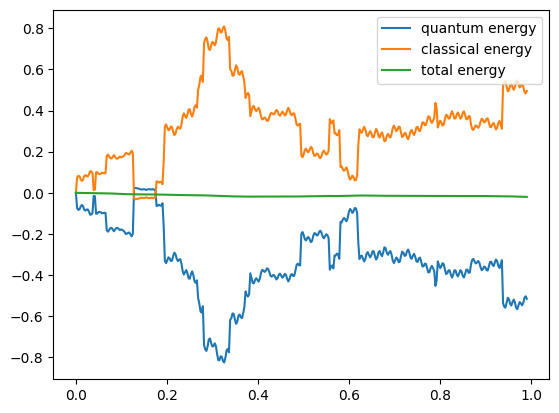

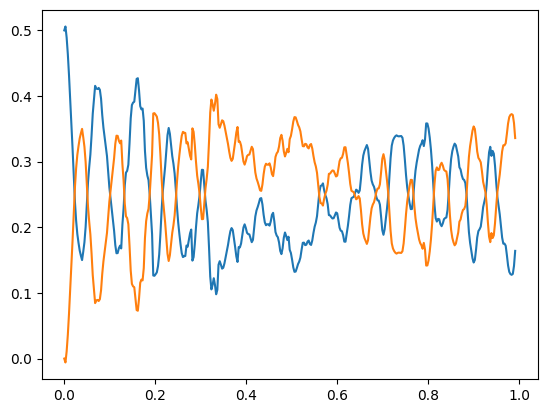

In [2]:
data = data_fssh
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))
t_ps = sim.settings.tdat_output * 0.0260677

import matplotlib.pyplot as plt
plt.plot(t_ps,eq-eq[0], label='quantum energy')
plt.plot(t_ps,ec-ec[0], label='classical energy') 
plt.plot(t_ps,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(t_ps,pops)
plt.show()

1000


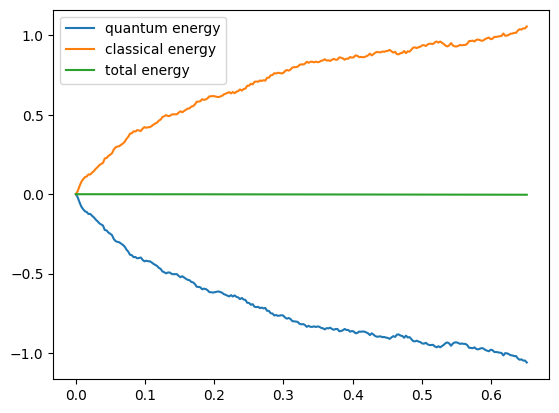

1000


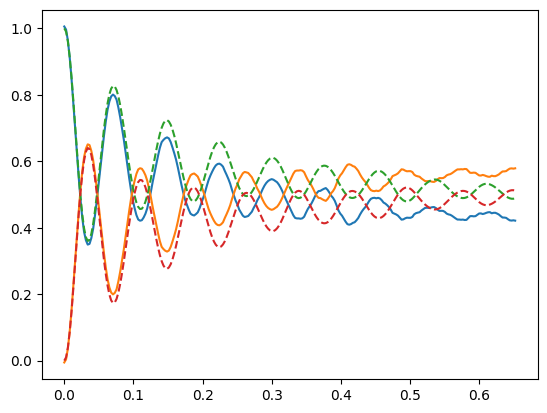

In [13]:
data = data_fssh
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))
t_ps = sim.settings.tdat_output * 0.0260677

import matplotlib.pyplot as plt
plt.plot(t_ps,eq-eq[0], label='quantum energy')
plt.plot(t_ps,ec-ec[0], label='classical energy') 
plt.plot(t_ps,eq-eq[0] + ec-ec[0], label='total energy') 
plt.legend()
plt.show()
plt.plot(t_ps,pops)
data = data_mf
ntraj = len(data.data_dic['seed'])
print(ntraj)
eq = np.real(data.data_dic['quantum_energy']/ntraj)
ec = np.real(data.data_dic['classical_energy']/ntraj)
pops = np.real(np.einsum('tii->ti', data.data_dic['dm_db']/ntraj))
plt.plot(t_ps,pops, linestyle='dashed')
plt.show()
